In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

pd.set_option('display.max_columns', None)

In [2]:
#Leemos los csv con pandas
df = pd.read_csv("files/Customer Flight Activity.csv",index_col=0 )
df2 = pd.read_csv("files/Customer Loyalty History.csv", index_col=0)

In [3]:
#Enseñamos las 5 primeras filas
df.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [4]:
df2.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
#Enseñamos los 5 ultimas filas

df.tail()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
999902,2018,12,0,0,0,0,0.0,0,0
999911,2018,12,0,0,0,0,0.0,0,0
999940,2018,12,3,0,3,1233,123.0,0,0
999982,2018,12,0,0,0,0,0.0,0,0
999986,2018,12,0,0,0,0,0.0,0,0


In [6]:
df2.tail()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [7]:
#Enseñamos 5 filas aleatorias

df.sample(5)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
807589,2017,12,17,0,17,2482,248.0,0,0
436874,2018,11,7,3,10,1350,135.0,0,0
262366,2017,1,1,1,2,2376,237.0,0,0
281926,2017,5,3,3,6,426,42.0,0,0
400873,2017,7,0,0,0,0,0.0,0,0


In [8]:
df2.tail(5)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [9]:
#Vemos las filas y las columnas de cada dataframe
df.shape

(405624, 9)

In [10]:
df2.shape

(16737, 15)

In [11]:
#Informacion general del dataframe
df.dtypes

Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [12]:
df2.dtypes

Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object

In [13]:
#Sacamos los nulos de cada columna

df.isnull().sum()

Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [14]:
df2.isnull().sum()

Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [15]:
#Resumen estadistico de las columnas numericas excluyendo columnas categoricas

df.describe(exclude="O").T

,count,mean,std,min,25%,50%,75%,max
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [16]:
#Incluyendo columnas categoricas
df2.describe(include="O").T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [17]:
df2.describe(exclude="O").T

,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [18]:
df.duplicated().sum()

228705

In [19]:
df2.duplicated().sum()

0

In [20]:
#Hacemos un merge con la columna Loyalty Number	
mergeado_inner = df.merge(df2, left_on='Loyalty Number', right_on = "Loyalty Number")
mergeado_inner.head()


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [21]:
#Miramos las columnas que tienen nulos
nulos_esta_num = mergeado_inner[mergeado_inner.columns[mergeado_inner.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')


In [22]:
#Hacemos el porcentaje de nulos en las columnas que tiene nulos
mergeado_inner[nulos_esta_num].isnull().sum() / df.shape[0]*100

Salary                25.312112
Cancellation Year     87.657535
Cancellation Month    87.657535
dtype: float64

In [23]:
# Verificar si hay índices duplicados en el DataFrame
duplicados = mergeado_inner.index.duplicated().sum()
print(f"Cantidad de índices duplicados: {duplicados}")

# Si deseas ver los índices duplicados
print(mergeado_inner.index[mergeado_inner.index.duplicated()])


Cantidad de índices duplicados: 388887
Index([100504, 100504, 101902, 100504, 100504, 106001, 100504, 100504, 107119,
       100504,
       ...
       999631, 999891, 999758, 999891, 999891, 999902, 999911, 999940, 999982,
       999986],
      dtype='int64', name='Loyalty Number', length=388887)


In [24]:
mergeado_inner.tail()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN
999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [25]:


# Ahora puedes proceder a usar fillna sin problemas
media_salary = mergeado_inner["Salary"].median()
media_salary = round(media_salary, 2)
mergeado_inner["Salary"] = mergeado_inner["Salary"].fillna(media_salary)

# Verificar que no queden valores nulos
nulos_after_fillna = mergeado_inner["Salary"].isnull().sum()
print(f"Después del 'fillna', tenemos {nulos_after_fillna} valores nulos en la columna 'Salary'")


Después del 'fillna', tenemos 0 valores nulos en la columna 'Salary'


In [26]:
mergeado_inner.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,73479.0,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,73479.0,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [27]:
# Rellenar con la moda
mergeado_inner["Cancellation Year"] = mergeado_inner["Cancellation Year"].fillna(mergeado_inner["Cancellation Year"].mode()[0])


In [28]:
# Rellenar con la moda
mergeado_inner["Cancellation Month"] = mergeado_inner["Cancellation Month"].fillna(mergeado_inner["Cancellation Month"].mode()[0])

In [29]:
mergeado_inner.isnull().sum()

Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

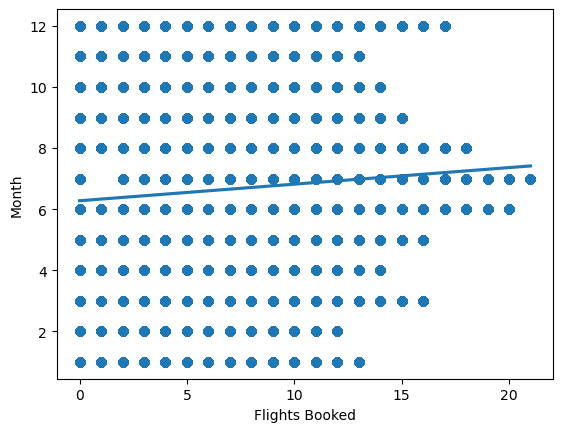

In [30]:
# Agrupar los datos por mes y contar los vuelos reservados por mes
sns.regplot(x = "Flights Booked", y="Month", data = mergeado_inner);


En los meses de verano y en el mes de diciembre hay mas vuelos que en el resto de meses.


2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

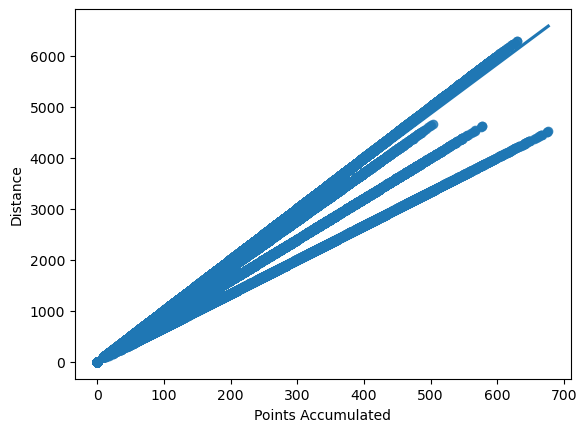

In [31]:
sns.regplot(x = "Points Accumulated", y="Distance", data = mergeado_inner);

Claramente se ve que cuanto mas viajas mas puntos acumulados hay.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

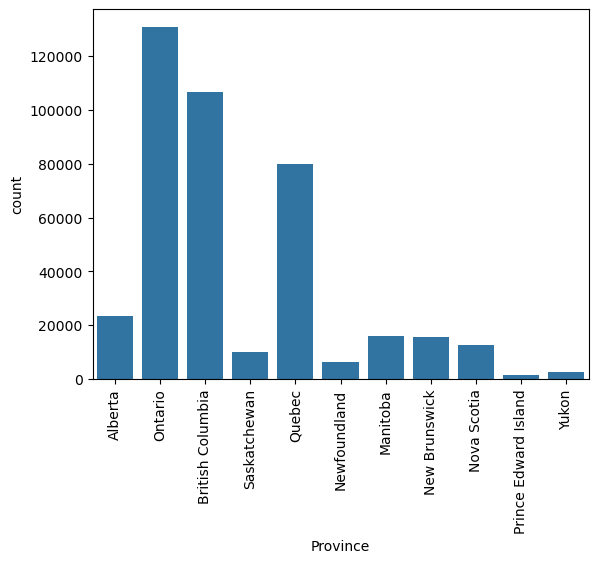

In [32]:
sns.countplot(x="Province", data = mergeado_inner, );
plt.xticks(rotation=90)
plt.show()

Hay muchos mas clientes de Ontario, British Columbia, Quebec.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

C:\Users\irene\AppData\Local\Temp\ipykernel_24952\3499066698.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "Education", y="Salary", data=mergeado_inner, ci=None)


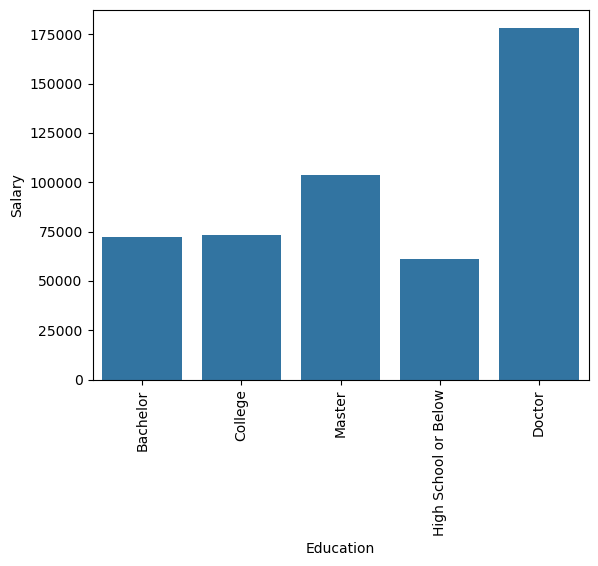

In [33]:
sns.barplot(x = "Education", y="Salary", data=mergeado_inner, ci=None)
plt.xticks(rotation=90)
plt.show();

El salario anual aumenta a medidad a medida que se incremente su nivel de estudios

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

C:\Users\irene\AppData\Local\Temp\ipykernel_24952\2179773655.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "Loyalty Card", y="Loyalty Number", data=mergeado_inner, ci=None);


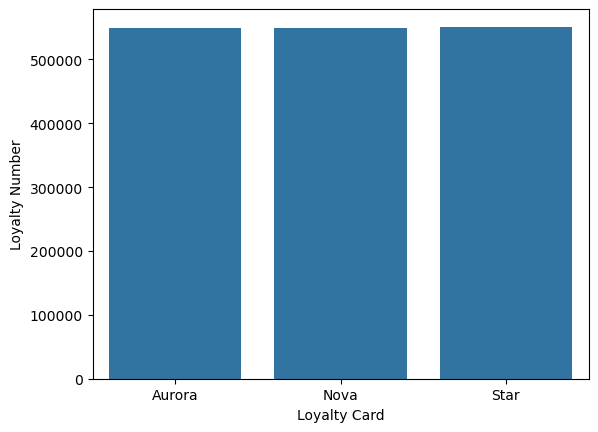

In [36]:
sns.barplot(x = "Loyalty Card", y="Loyalty Number", data=mergeado_inner, ci=None);

Hay practicamente los mismos clientes en cada grupo.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [37]:
df_clientes = mergeado_inner.groupby("Gender")["Marital Status"].count().reset_index()
df_clientes

,Gender,Marital Status
0,Female,203640
1,Male,201984


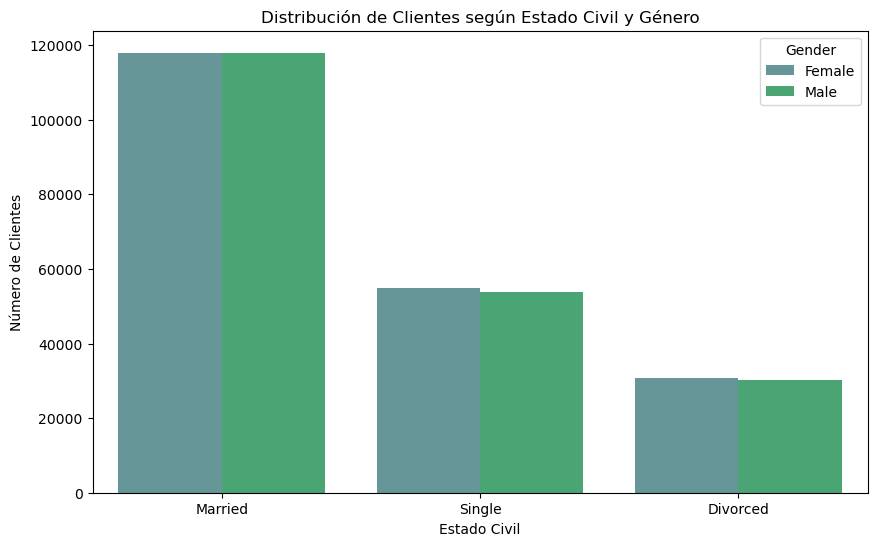

In [49]:
# Crear gráfico de barras agrupadas usando seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital Status', hue='Gender', data=mergeado_inner, palette=["cadetblue", "mediumseagreen"])

# Añadir etiquetas y título
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes según Estado Civil y Género')

# Mostrar el gráfico
plt.show()
